In [2]:
import sys
import os
sys.path.append("../../FinanceDataSource")
import FinanceDataSource
import tushare as ts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #要注意的是一旦导入了seaborn，matplotlib的默认作图风格就会被覆盖成seaborn的格式
import pandas as pd
import numpy as np
from pandas import DataFrame
from FinanceDataSource import get_cn_stocks
from FinanceDataSource import get_data
from FinanceDataSource import str_cn_stock



In [3]:
print("我这个程序打算看看，每天上涨的股票的比率。这个首先是取得所有的股票。")

我这个程序打算看看，每天上涨的股票的比率。这个首先是取得所有的股票。


In [29]:

# 首先取得所有的股票
_all_cn_stock = get_cn_stocks()
# 建立一个新的DataFrame变量
_df=DataFrame()

def get_all_data():
    _lst_frame = []
    # 然后遍历所有的股票
    for _stock in _all_cn_stock:
        # 取得这个股票的所有数据。
        _data = get_data(str_cn_stock, _stock)
        # 删掉所有当天没有交易的，即股价为0的，这个没有任何意义。
        _data=_data.loc[_data['Close']!=0]
        # 加上一列，是股票名称
        _data['stock_name'] = _stock
        _data['price_change']=_data["Close"].astype(float).diff()
        _data['percent_change']=_data["Close"].astype(float).diff()/_data["Close"].astype(float)*100
        # 添加到列表中
        _lst_frame.append(_data)
    return _lst_frame
# 然后合并
%time _df = pd.concat(get_all_data())
# 这样就得到一个表了。
print(len(_df))

Wall time: 38.5 s
6242864


In [30]:
_df

,Open,High,Low,Close,volume,Amount,stock_name,price_change,percent_change
,,,,,,,,,
2005-01-04,1.552016,1.552016,1.521400,1.535531,7.476649e+06,11465602,000001.XSHE,NaN,NaN
2005-01-05,1.535531,1.542596,1.495494,1.521400,1.368151e+07,20718558,000001.XSHE,-0.014131,-0.928793
2005-01-06,1.530821,1.552016,1.519045,1.535531,1.132183e+07,17333840,000001.XSHE,0.014131,0.920245
2005-01-07,1.549661,1.554372,1.521400,1.533176,8.008765e+06,12302853,000001.XSHE,-0.002355,-0.153610
2005-01-10,1.533176,1.552016,1.500204,1.552016,1.117594e+07,17111498,000001.XSHE,0.018841,1.213961
2005-01-12,1.554372,1.556727,1.523755,1.537886,6.957934e+06,10672635,000001.XSHE,-0.014131,-0.918836
2005-01-13,1.537886,1.554372,1.530821,1.547306,6.797029e+06,10504590,000001.XSHE,0.009420,0.608828
2005-01-14,1.549661,1.554372,1.528465,1.530821,6.813996e+06,10476658,000001.XSHE,-0.016486,-1.076923
2005-01-17,1.523755,1.523755,1.462522,1.471943,1.346608e+07,20039970,000001.XSHE,-0.058878,-4.000000


In [31]:
print("然后我要取得所有的时间，不重复的。")

然后我要取得所有的时间，不重复的。


In [48]:
%time _date_all=_df.index.drop_duplicates()
_date_all

Wall time: 163 ms


DatetimeIndex(['2005-01-04', '2005-01-05', '2005-01-06', '2005-01-07',
               '2005-01-10', '2005-01-12', '2005-01-13', '2005-01-14',
               '2005-01-17', '2005-01-18',
               ...
               '2005-10-11', '2005-10-12', '2005-10-13', '2005-10-14',
               '2005-10-17', '2005-10-18', '2005-10-19', '2006-05-30',
               '2006-07-17', '2010-08-10'],
              dtype='datetime64[ns]', name='', length=3174, freq=None)

In [70]:
# 建立一个变量来表示某天中上涨的比率。
_df_percent=DataFrame(index=_date_all)
import numpy as np
_df_percent["percent_change"]=np.zeros(len(_df_percent))
# 然后遍历日期
for _date_item in _date_all:
    _str_date_time=_date_item.strftime('%Y-%m-%d')
    _data_item=_df[_str_date_time]
    _df_percent["percent_change"][_str_date_time]=len(_data_item.loc[(_data_item["percent_change"]>0)])/len(_data_item)*100
    pass
_df_percent

,percent_change
,
2005-01-04,0.000000
2005-01-05,89.703588
2005-01-06,20.826833
2005-01-07,65.183450
2005-01-10,78.046875
2005-01-12,37.236534
2005-01-13,47.697112
2005-01-14,15.000000
2005-01-17,10.867866


In [71]:
_df_percent.to_csv('_df_percent_cn.csv')

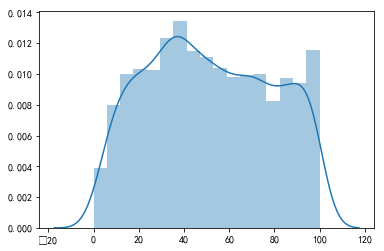

In [72]:
sns.distplot(_df_percent)

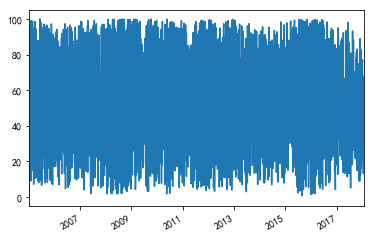

In [73]:
_df_percent["percent_change"].plot()